<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/TRADE_PROBABILITIES_BASE_FILE_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
# importing dependent libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

**Base Capital**

**Part of capital use into trade**

**Target pionts**

**Stoploss points**

**Random Target and Stoploss ratio is 40 % target and 60 % stoploss**


In [ ]:
# Constants defined
BASE_CAPITAL = 25000
PERCENTAGE = 0.30  # 30% of capital
LOT_SIZE = 15  # 15 units per trade
TARGET_PCT = 40
STOPLOSS_PCT = 60
RISK = 20
REWARD = RISK*2.5

***Charges applicable on buy and sell in options ***

In [ ]:
# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

# **ENTRY PRICE**

In [ ]:
# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Generate 1000 columns with random numbers between 100 and 500
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [random.randint(300, 450) for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('trade_entry_1001_columns.csv', index=False)

# Print confirmation message
print("CSV file 'trade_entry_1001_columns.csv' has been created.")

CSV file 'trade_entry_1001_columns.csv' has been created.


In [ ]:
pd.read_csv('trade_entry_1001_columns.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,423,449,444,371,365,425,354,376,375,...,408,403,426,328,360,370,417,392,317,365
1,TRADE 0002,351,399,416,436,371,324,300,394,343,...,389,339,338,301,318,361,348,328,410,330
2,TRADE 0003,398,425,436,326,439,316,368,323,414,...,450,410,325,313,403,386,322,405,345,384
3,TRADE 0004,400,308,378,412,300,334,364,429,376,...,392,315,379,341,365,443,338,430,358,303
4,TRADE 0005,432,306,398,414,352,358,380,314,368,...,431,412,404,375,380,420,352,406,395,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,334,386,411,355,318,336,411,397,399,...,356,316,408,448,402,412,424,406,407,366
996,TRADE 0997,302,356,363,393,376,442,343,403,413,...,448,433,309,316,358,355,360,371,423,390
997,TRADE 0998,375,335,333,430,323,405,438,438,309,...,300,388,416,343,389,399,361,316,366,367
998,TRADE 0999,433,311,333,320,338,416,317,409,437,...,426,310,374,326,440,391,393,417,305,356


# **RANDOM TARGET AND STOPLOSS**

**40 % TARGET 60 % STOPLOSS**

**RISK:REWARD 1:2.5**

In [ ]:
# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Function to randomly assign "TARGET" (40%) or "STOPLOSS" (60%)
def assign_target_or_stoploss():
    return random.choices(["TARGET", "STOPLOSS"], weights=[TARGET_PCT, STOPLOSS_PCT], k=1)[0]

# Generate 1000 columns with "TARGET" or "STOPLOSS"
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [assign_target_or_stoploss() for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('trade_target_stoploss_1001_columns.csv', index=False)

# Print confirmation message
print("CSV file 'trade_target_stoploss_1001_columns.csv' has been created.")


CSV file 'trade_target_stoploss_1001_columns.csv' has been created.


In [ ]:
pd.read_csv('trade_target_stoploss_1001_columns.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,TARGET,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS
1,TRADE 0002,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,...,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET
2,TRADE 0003,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS
3,TRADE 0004,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,...,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
4,TRADE 0005,TARGET,TARGET,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,...,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,...,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET
996,TRADE 0997,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,...,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET
997,TRADE 0998,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,...,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET
998,TRADE 0999,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,...,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS


Max and min count percentage of "Target" and average count of "Target"



In [ ]:
# Load the CSV file
df_t = pd.read_csv('trade_target_stoploss_1001_columns.csv')

# Exclude "TRADE NO" from the calculations
df_t_excluded = df_t.drop(columns=["TRADE NO"])

# 1. Calculate max value of count "TARGET" and its column name
max_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmax()  # Get column name
max_target_value = (df_t_excluded[max_target_column] == "TARGET").sum()  # Get max value
max_target_percentage = (max_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Max Count of 'TARGET': {max_target_percentage:.1f} % in Column: {max_target_column}")

# 2. Calculate min value of count "TARGET" and its column name
min_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmin()  # Get column name
min_target_value = (df_t_excluded[min_target_column] == "TARGET").sum()  # Get min value
min_target_percentage = (min_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Min Count of 'TARGET': {min_target_percentage:.1f} % in Column: {min_target_column}")

# 3. Calculate average value of count "TARGET" from all columns
target_counts = df_t_excluded.apply(lambda col: (col == "TARGET").sum())  # Count "TARGET" in each column
average_target_value = target_counts.mean()  # Calculate average
average_target_percentage = (average_target_value / len(df_t) * 100)  # Convert to percentage
print(f"Average Count of 'TARGET': {average_target_percentage:.2f} %")

Max Count of 'TARGET': 44.7 % in Column: COLUMN_324
Min Count of 'TARGET': 34.5 % in Column: COLUMN_751
Average Count of 'TARGET': 39.96 %


IF you want to test random column you can enter the name of columns here

In [ ]:
column_name = 'COLUMN_125' # select column_name from COLUMN_1 to COLUMN_1000 COLUMN_888_CUM_PNL
# Count the frequency of "TARGET" and "STOPLOSS" in COLUMN_1
frequency = df_t[column_name].value_counts()/10

# Print the results
print(frequency)

COLUMN_125
STOPLOSS    57.0
TARGET      43.0
Name: count, dtype: float64


# **PnL**

PnL without charges and only one lot

In [ ]:
# Load the two CSV files
entry_df = pd.read_csv('trade_entry_1001_columns.csv')
target_stoploss_df = pd.read_csv('trade_target_stoploss_1001_columns.csv')

# Create an empty dictionary to hold the PnL data
pnl_data = {
    "TRADE NO": entry_df["TRADE NO"]  # Retain the "TRADE NO" column
}

# Iterate over each column (excluding "TRADE NO") to apply the PnL logic
for column in entry_df.columns[1:]:
    # Calculate PnL values for the column
    pnl_values = target_stoploss_df[column].apply(lambda x: (REWARD if x == "TARGET" else -RISK) * LOT_SIZE)

    # Create a Series with the base capital and concatenate it with PnL values
    base_series = pd.Series([BASE_CAPITAL])
    cumulative_pnl = pd.concat([base_series, pnl_values], ignore_index=True).cumsum()

    # Store the cumulative PnL in the dictionary (excluding the initial capital row)
    pnl_data[column] = cumulative_pnl.iloc[1:].values

# Create a DataFrame from the PnL data
pnl_df = pd.DataFrame(pnl_data)

# Save the modified PnL DataFrame to a new CSV file
pnl_df.to_csv('trade_pnl_1001_columns.csv', index=False)

# Print confirmation message
print("CSV file 'trade_pnl_1001_columns.csv' has been created with cumulative PnL and base capital added.")

CSV file 'trade_pnl_1001_columns.csv' has been created with cumulative PnL and base capital added.


In [ ]:
pd.read_csv('trade_pnl_1001_columns.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,24700.0,24700.0,25750.0,25750.0,24700.0,24700.0,24700.0,24700.0,25750.0,...,25750.0,24700.0,25750.0,25750.0,25750.0,24700.0,24700.0,24700.0,25750.0,24700.0
1,TRADE 0002,24400.0,25450.0,26500.0,26500.0,24400.0,24400.0,25450.0,24400.0,26500.0,...,26500.0,25450.0,26500.0,25450.0,26500.0,24400.0,24400.0,25450.0,25450.0,25450.0
2,TRADE 0003,24100.0,25150.0,27250.0,27250.0,24100.0,25150.0,26200.0,25150.0,27250.0,...,26200.0,25150.0,26200.0,25150.0,26200.0,24100.0,24100.0,26200.0,26200.0,25150.0
3,TRADE 0004,23800.0,25900.0,28000.0,28000.0,23800.0,25900.0,25900.0,24850.0,26950.0,...,26950.0,25900.0,26950.0,24850.0,26950.0,23800.0,24850.0,25900.0,25900.0,24850.0
4,TRADE 0005,24550.0,26650.0,28750.0,27700.0,24550.0,26650.0,26650.0,25600.0,26650.0,...,26650.0,26650.0,27700.0,25600.0,27700.0,23500.0,24550.0,25600.0,26650.0,25600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,142000.0,121000.0,155650.0,152500.0,163000.0,154600.0,125200.0,148300.0,154600.0,...,159850.0,156700.0,145150.0,126250.0,145150.0,148300.0,115750.0,173500.0,167200.0,143050.0
996,TRADE 0997,142750.0,121750.0,156400.0,152200.0,162700.0,154300.0,125950.0,148000.0,155350.0,...,159550.0,157450.0,144850.0,125950.0,144850.0,149050.0,115450.0,173200.0,167950.0,143800.0
997,TRADE 0998,142450.0,122500.0,156100.0,152950.0,162400.0,154000.0,125650.0,148750.0,156100.0,...,160300.0,157150.0,145600.0,126700.0,144550.0,148750.0,116200.0,172900.0,167650.0,144550.0
998,TRADE 0999,142150.0,123250.0,155800.0,153700.0,163150.0,153700.0,125350.0,149500.0,156850.0,...,160000.0,156850.0,146350.0,126400.0,145300.0,148450.0,115900.0,173650.0,167350.0,144250.0


In [ ]:
# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')

# Get the last row as a DataFrame
last_row_df = df_no_charges.iloc[[-1]]

# Filter only numeric values
numeric_values = last_row_df.select_dtypes(include=['number'])

# Find the max and min values along with their corresponding column names
max_value = numeric_values.max(axis=1).values[0]  # Max value
max_column = numeric_values.idxmax(axis=1).values[0]  # Column name of max value

min_value = numeric_values.min(axis=1).values[0]  # Min value
min_column = numeric_values.idxmin(axis=1).values[0]  # Column name of min value

# Output the results
print(f"Max Capital: {max_value} in Column: {max_column}")
print(f"Min Capital: {min_value} in Column: {min_column}")


Max Capital: 194350.0 in Column: COLUMN_324
Min Capital: 87250.0 in Column: COLUMN_751


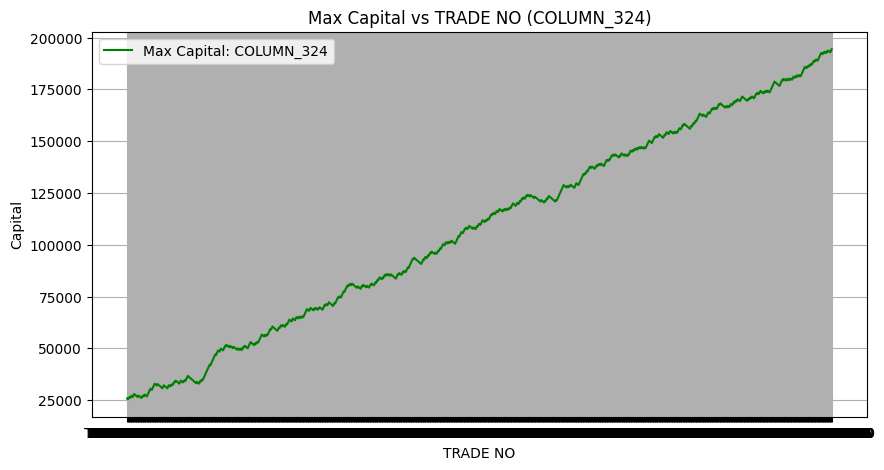

In [ ]:
# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')

# Identify the max value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_column = numeric_values.idxmax(axis=1).values[0]

# Plot max capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[max_column], label=f'Max Capital: {max_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_column})')
plt.legend()
plt.grid(True)
plt.show()


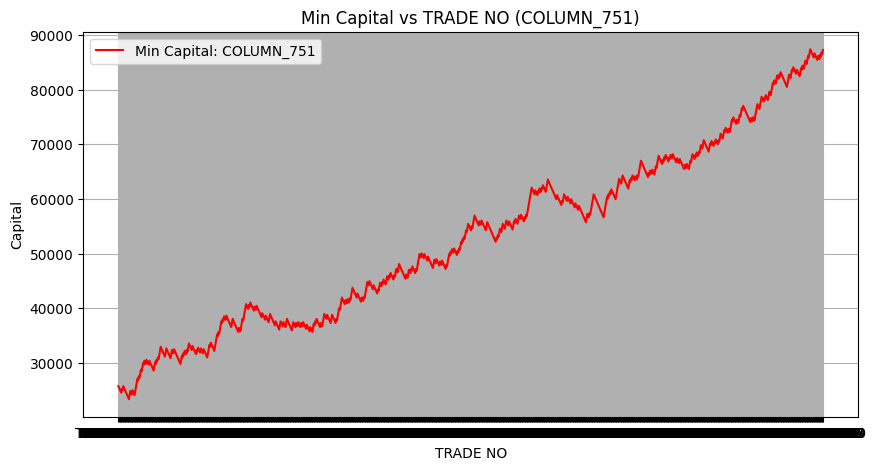

In [ ]:
# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')

# Identify the min value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_column = numeric_values.idxmin(axis=1).values[0]

# Plot min capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[min_column], label=f'Min Capital: {min_column}', color='red')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_column})')
plt.legend()
plt.grid(True)
plt.show()


# **QUANTITY CALCULATION**

PnL without charges and lot qty based on capital wise

In [ ]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry_1001_columns.csv')
target_stoploss_df = pd.read_csv('trade_target_stoploss_1001_columns.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Calculate QTY for the current row
        entry_price = entry_df[column].iloc[i]
        capital_allocation = cumulative_capital * PERCENTAGE
        qty = int(capital_allocation / (entry_price * LOT_SIZE)) if entry_price > 0 else 0
        qty_column.append(qty)

        # Calculate PnL for the current trade based on the target/stoploss
        pnl_value = (REWARD if target_stoploss_df[column].iloc[i] == "TARGET" else -RISK) * LOT_SIZE
        trade_pnl = qty * pnl_value  # Multiply QTY with PnL per trade

        # Update cumulative capital for the next row
        cumulative_capital += trade_pnl
        pnl_column.append(cumulative_capital)

    # Store the PnL and QTY values in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Save the DataFrame to a single CSV file
final_df.to_csv('final_PnL_QTY.csv', index=False)

# Print confirmation message
print("CSV file 'final_PnL_QTY.csv' has been created with QTY and cumulative PnL.")

CSV file 'final_PnL_QTY.csv' has been created with QTY and cumulative PnL.


In [ ]:
pd.read_csv('final_PnL_QTY.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,24700.0,1,24700.0,1,25750.0,1,25750.0,1,...,1,24700.0,1,24700.0,1,24700.0,1,25750.0,1,24700.0
1,TRADE 0002,1,24400.0,1,25450.0,1,26500.0,1,26500.0,1,...,1,24400.0,1,24400.0,1,25450.0,1,25450.0,1,25450.0
2,TRADE 0003,1,24100.0,1,25150.0,1,27250.0,1,27250.0,1,...,1,24100.0,1,24100.0,1,26200.0,1,26200.0,1,25150.0
3,TRADE 0004,1,23800.0,1,25900.0,1,28000.0,1,28000.0,1,...,1,23800.0,1,24850.0,1,25900.0,1,25900.0,1,24850.0
4,TRADE 0005,1,24550.0,1,26650.0,1,28750.0,1,27700.0,1,...,1,23500.0,1,24550.0,1,25600.0,1,26650.0,1,25600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,332,5803600.0,92,1845400.0,604,12866350.0,554,9680950.0,1064,...,382,7757950.0,57,1272250.0,1449,29000050.0,979,20662150.0,337,6426400.0
996,TRADE 0997,384,6091600.0,103,1922650.0,708,13397350.0,492,9533350.0,942,...,437,8085700.0,70,1251250.0,1563,28531150.0,976,21394150.0,329,6673150.0
997,TRADE 0998,324,5994400.0,114,2008150.0,804,13156150.0,443,9865600.0,1079,...,405,7964200.0,69,1303000.0,1805,27989650.0,1169,21043450.0,363,6945400.0
998,TRADE 0999,276,5911600.0,129,2104900.0,790,12919150.0,616,10327600.0,1012,...,407,7842100.0,66,1283200.0,1342,28996150.0,1379,20629750.0,390,6828400.0


In [ ]:
# Load the data from the CSV file
df_QTY = pd.read_csv('final_PnL_QTY.csv')

# Get the last row
last_row = df_QTY.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")

Max QTY: 4719 in Column: COLUMN_324_QTY
Max Capital: 91899100 in Column: COLUMN_800_CUM_PNL
Min Capital: 303850 in Column: COLUMN_751_CUM_PNL


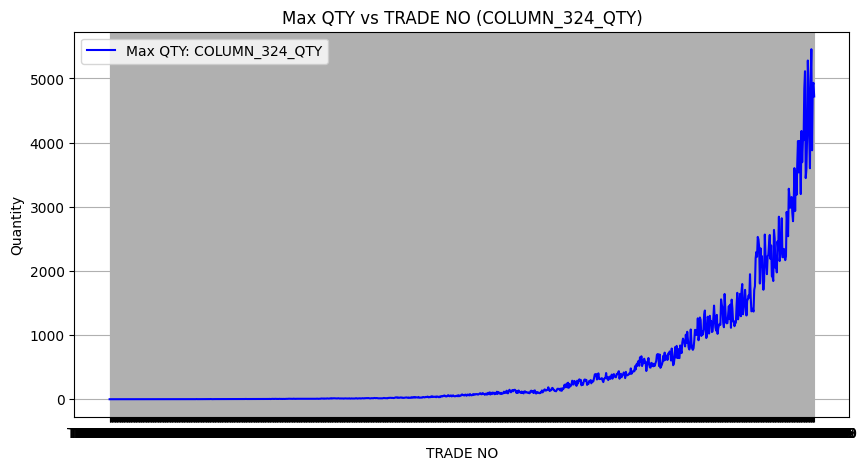

In [ ]:
# Load the data from the CSV file
df_QTY = pd.read_csv('final_PnL_QTY.csv')

# Identify the column with max QTY
last_row = df_QTY.iloc[-1]
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_qty_column], label=f'Max QTY: {max_qty_column}', color='blue')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


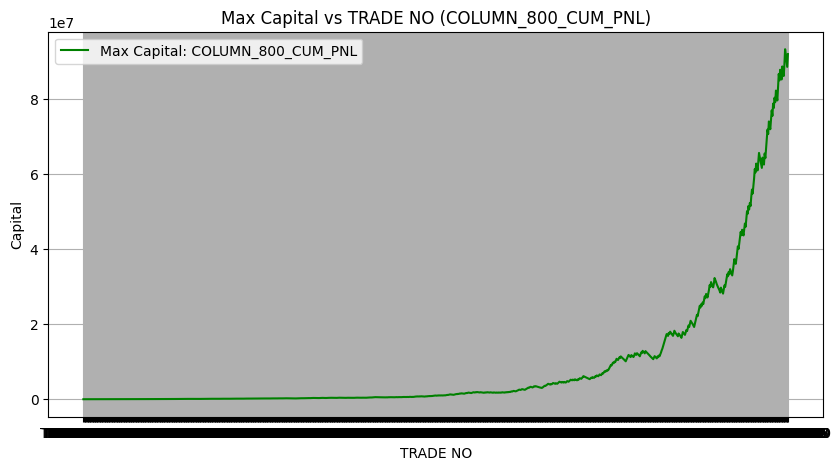

In [ ]:
# Load the data from the CSV file
df_QTY = pd.read_csv('final_PnL_QTY.csv')

# Identify the column with max capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

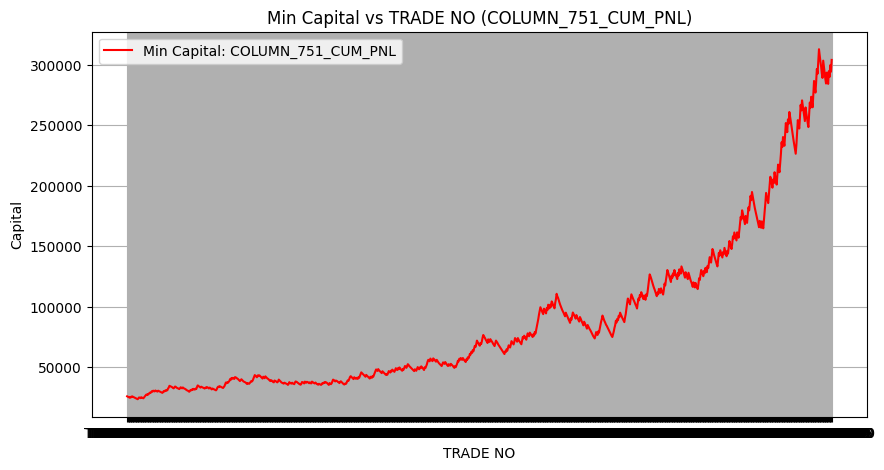

In [ ]:
# Load the data from the CSV file
df_QTY = pd.read_csv('final_PnL_QTY.csv')

# Identify the column with min capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY['TRADE NO'], df_QTY[min_capital_column], label=f'Min Capital: {min_capital_column}', color='red')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()

PnL including charges and lot qty based on capital wise

In [ ]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry_1001_columns.csv')
target_stoploss_df = pd.read_csv('trade_target_stoploss_1001_columns.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Extract entry price and target/stoploss information
        entry_price = entry_df[column].iloc[i]
        target_or_stoploss = target_stoploss_df[column].iloc[i]

        # Calculate QTY for the current row
        capital_allocation = cumulative_capital * PERCENTAGE
        qty = int(capital_allocation / (entry_price * LOT_SIZE)) if entry_price > 0 else 0
        qty_column.append(qty)

        # Calculate Buy and Sell Values
        buy_value = entry_price * LOT_SIZE * qty
        sell_value = (entry_price + (REWARD if target_or_stoploss == "TARGET" else -RISK)) * LOT_SIZE * qty

        # Calculate Net PnL
        net_pnl = sell_value - buy_value

        # Calculate Transaction Charges
        transaction_charges_buy = transaction_charges_pct / 100 * buy_value
        transaction_charges_sell = transaction_charges_pct / 100 * sell_value
        stt = stt_pct / 100 * sell_value
        ipft = ipft_pct / 100 * (buy_value + sell_value)
        stamp_duty = stamp_duty_pct / 100 * (buy_value + sell_value)
        sebi_charges = sebi_charges_pct / 100 * (buy_value + sell_value)

        # Total Charges
        total_charges = (brokerage +
                         transaction_charges_buy +
                         transaction_charges_sell +
                         stt +
                         ipft +
                         stamp_duty +
                         sebi_charges)

        # GST Calculation
        gst = gst_pct * (brokerage + transaction_charges_buy + transaction_charges_sell + stt + ipft + stamp_duty + sebi_charges)

        # Final PnL Calculation
        if net_pnl > 0:  # Profit scenario
            final_pnl = net_pnl - (total_charges + gst)
        else:  # Loss scenario
            final_pnl = net_pnl + (-total_charges - gst)

        # Update cumulative capital for the next row
        cumulative_capital += final_pnl
        pnl_column.append(cumulative_capital)

    # Store the QTY values as integers and cumulative PnL as floats in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Format the cumulative PnL column to 2 decimal places
for column in entry_df.columns[1:]:
    final_df[f"{column}_CUM_PNL"] = final_df[f"{column}_CUM_PNL"].apply(lambda x: f"{x:.2f}")

# Save the DataFrame to a single CSV file
final_df.to_csv('final_PnL_QTY_C.csv', index=False)

# Print confirmation message
print("CSV file 'final_PnL_QTY_C.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.")

CSV file 'final_PnL_QTY_C.csv' has been created with QTY as integers and cumulative PnL formatted to two decimal places.


In [ ]:
pd.read_csv('final_PnL_QTY_C.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,24687.21,1,24686.39,1,25734.83,1,25737.12,1,...,1,24688.87,1,24687.40,1,24688.18,1,25738.82,1,24689.03
1,TRADE 0002,1,24376.67,1,25422.63,1,26470.54,1,26472.20,1,...,1,24378.02,1,24376.96,1,25426.65,1,25426.43,1,25427.43
2,TRADE 0003,1,24064.67,1,25109.78,1,27205.62,1,27210.74,1,...,1,24066.39,1,24067.33,1,26162.70,1,26164.37,1,25115.87
3,TRADE 0004,1,23752.59,1,25848.88,1,27942.52,1,27946.57,1,...,1,23752.97,1,24805.49,1,25849.69,1,25853.61,1,24806.84
4,TRADE 0005,1,24487.80,1,26588.04,1,28678.80,1,27634.06,1,...,1,23440.27,1,24494.92,1,25537.43,1,26589.98,1,25542.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,182,3183775.32,50,1004336.19,331,7057683.17,310,5413305.81,579,...,221,4495098.93,31,700606.11,785,15703079.46,551,11637927.30,171,3267609.46
996,TRADE 0997,210,3339027.87,56,1045641.98,388,7343788.15,275,5327549.90,512,...,253,4681720.57,38,688795.53,846,15439847.07,550,12042453.10,167,3390611.11
997,TRADE 0998,178,3283620.92,62,1091414.24,441,7207097.04,247,5509164.50,587,...,234,4608706.03,38,716818.50,977,15137540.05,658,11837820.02,184,3526266.66
998,TRADE 0999,151,3236343.62,70,1143145.32,432,7073195.55,344,5763288.68,550,...,235,4535438.45,36,705592.26,726,15671650.79,776,11597974.99,198,3464752.25


In [ ]:
# Load the data from the CSV file
df_QTY_C = pd.read_csv('final_PnL_QTY_C.csv')

# Get the last row
last_row = df_QTY_C.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")

Max QTY: 2606 in Column: COLUMN_324_QTY
Max Capital: 49692498 in Column: COLUMN_800_CUM_PNL
Min Capital: 169370 in Column: COLUMN_751_CUM_PNL


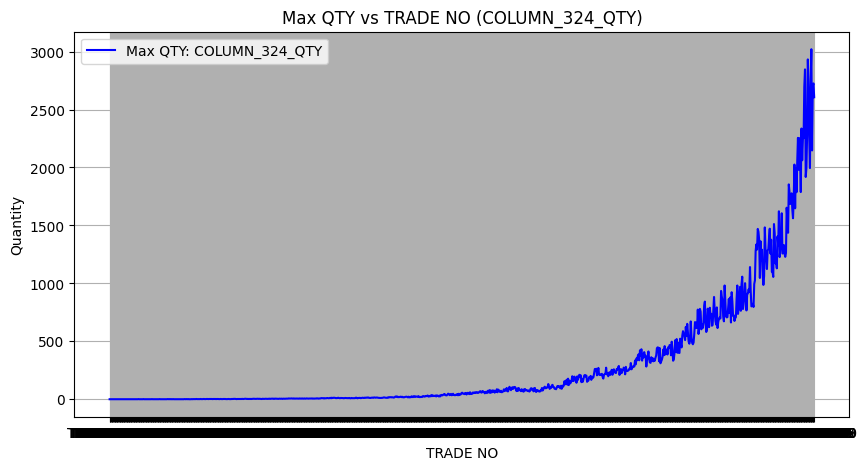

In [ ]:
# Load the data from the CSV file
df_QTY_C = pd.read_csv('final_PnL_QTY_C.csv')

# Identify the column with max QTY from the last row
last_row = df_QTY_C.iloc[-1]
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_qty_column], label=f'Max QTY: {max_qty_column}', color='blue')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(True)
plt.show()


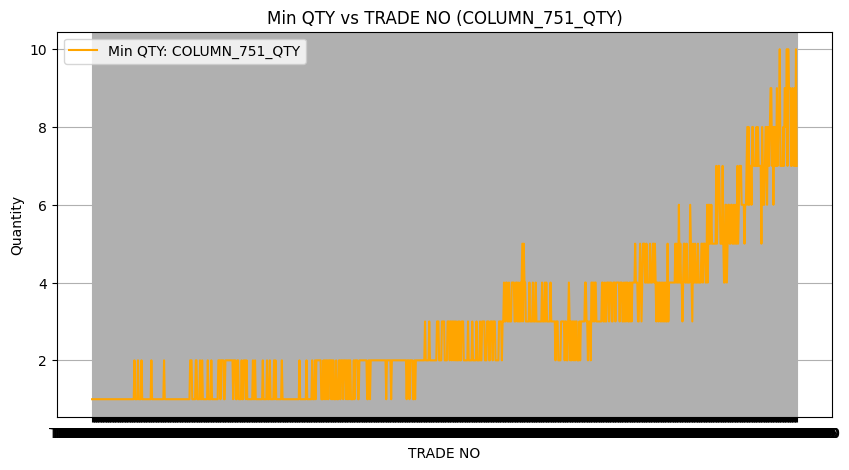

In [ ]:
# Identify the column with min QTY from the last row
min_qty_column = last_row[qty_columns].idxmin()

# Plot Min QTY vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_qty_column], label=f'Min QTY: {min_qty_column}', color='orange')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Min QTY vs TRADE NO ({min_qty_column})')
plt.legend()
plt.grid(True)
plt.show()

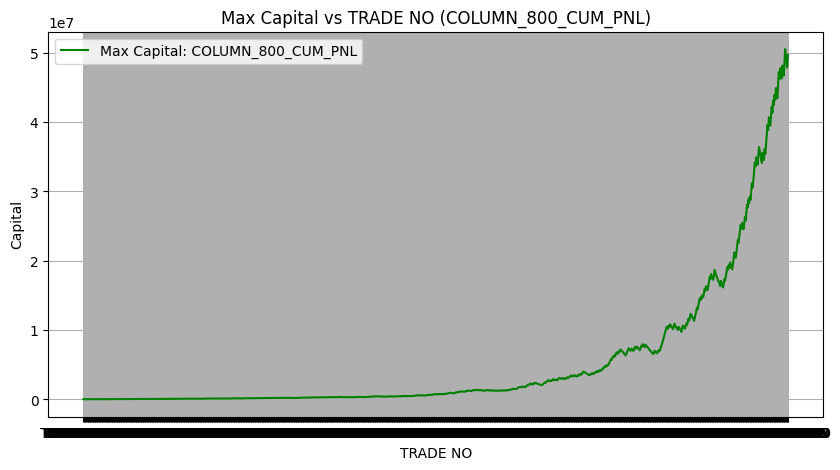

In [ ]:
# Identify the column with max capital from the last row
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


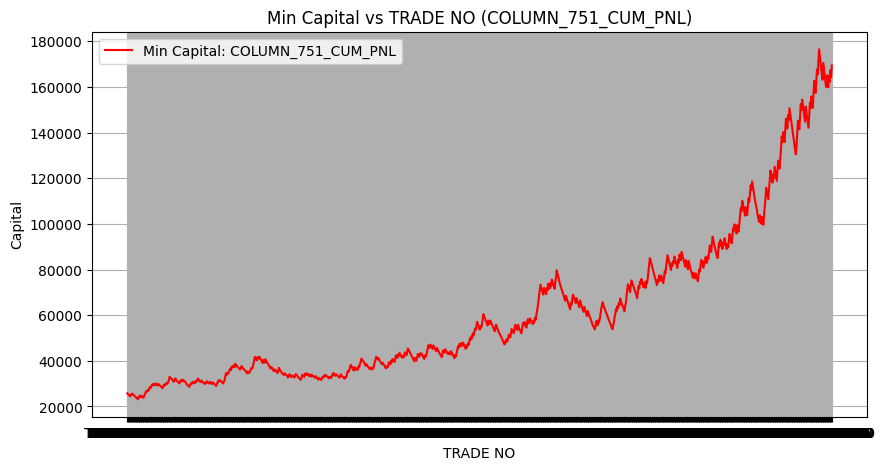

In [ ]:
# Identify the column with min capital from the last row
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(10, 5))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_capital_column], label=f'Min Capital: {min_capital_column}', color='red')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(True)
plt.show()


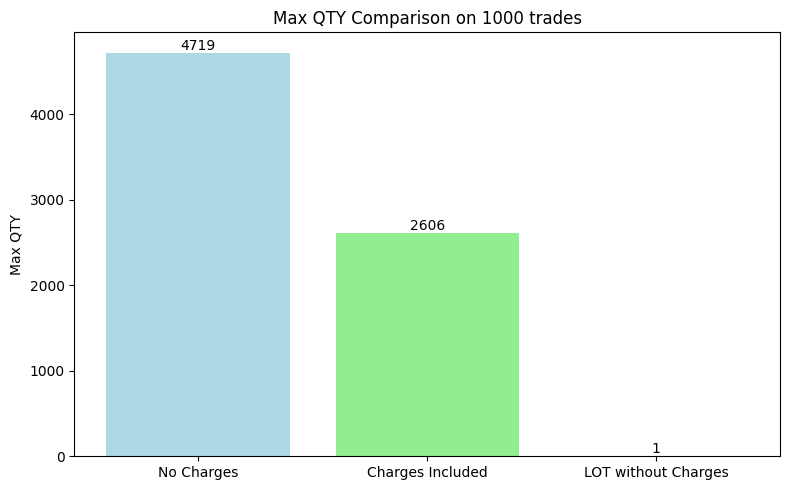

In [ ]:
def get_summary_QTY(file_name):
    # Load the data from the CSV file
    df_Max_QTY = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Max_QTY.iloc[-1]

    # Extract QTY values and find max along with their corresponding column names
    qty_columns = [col for col in df_Max_QTY.columns if col.endswith('_QTY')]

    # If there are no quantity columns, assume max qty as 1
    if qty_columns:
        max_qty = last_row[qty_columns].max()
    else:
        max_qty = 1  # Assume max qty as 1 if no qty columns are present

    return max_qty

# Get Max QTY for both files
max_qty_no_charges = get_summary_QTY('final_PnL_QTY.csv')        # No charges included
max_qty_charges = get_summary_QTY('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
# Assume max quantity for the trade CSV file is 1
max_qty_additional = 1

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
max_qty_values = [max_qty_no_charges, max_qty_charges, max_qty_additional]

# Create bar chart for Max QTY
plt.figure(figsize=(8, 5))
plt.bar(labels, max_qty_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max QTY')
plt.title('Max QTY Comparison on 1000 trades')
for i, v in enumerate(max_qty_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()

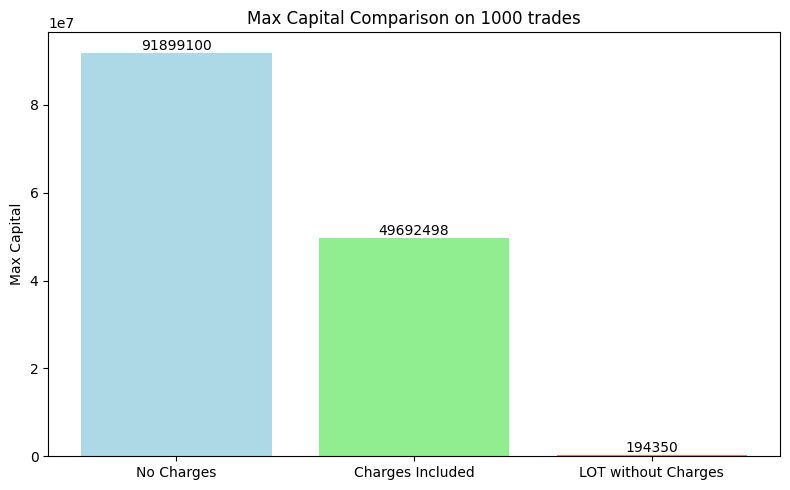

In [ ]:
def get_summary_capital(file_name):
    # Load the data from the CSV file
    df_Max_Capital = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Max_Capital.iloc[-1]

    # Extract CUM_PNL values and find max along with their corresponding column names
    capital_columns = [col for col in df_Max_Capital.columns if col.endswith('_CUM_PNL')]
    max_capital = last_row[capital_columns].max()

    return max_capital

# Get Max Capital for both files
max_capital_no_charges = get_summary_capital('final_PnL_QTY.csv')        # No charges included
max_capital_charges = get_summary_capital('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_capital_additional = numeric_values.max(axis=1).values[0]  # Get the max value from the Series

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
max_capital_values = [max_capital_no_charges, max_capital_charges, max_capital_additional]

# Create bar chart for Max Capital
plt.figure(figsize=(8, 5))
plt.bar(labels, max_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max Capital')
plt.title('Max Capital Comparison on 1000 trades')
for i, v in enumerate(max_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()

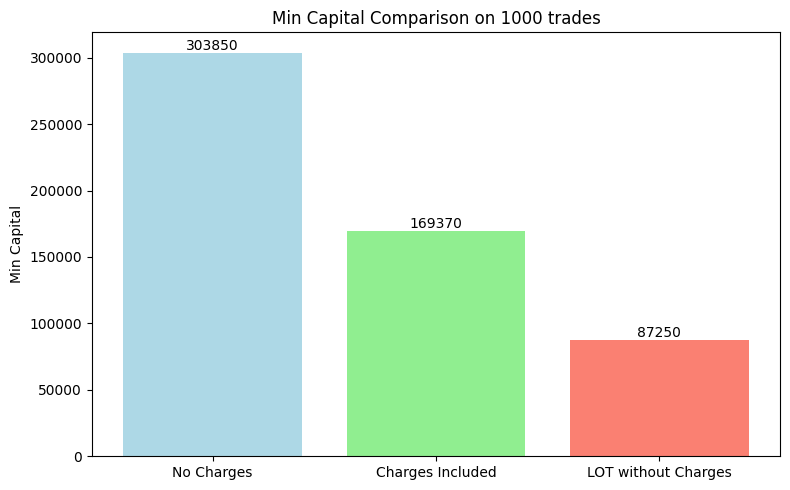

In [ ]:
def get_summary_min_capital(file_name):
    # Load the data from the CSV file
    df_Min_Capital = pd.read_csv(file_name)

    # Get the last row
    last_row = df_Min_Capital.iloc[-1]

    # Extract CUM_PNL values and find min along with their corresponding column names
    capital_columns = [col for col in df_Min_Capital.columns if col.endswith('_CUM_PNL')]
    min_capital = last_row[capital_columns].min()

    return min_capital

# Get Min Capital for both files
min_capital_no_charges = get_summary_min_capital('final_PnL_QTY.csv')        # No charges included
min_capital_charges = get_summary_min_capital('final_PnL_QTY_C.csv')        # Charges included

# Load the trade data for additional output
df_no_charges = pd.read_csv('trade_pnl_1001_columns.csv')
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_capital_additional = numeric_values.min(axis=1).values[0]  # Get the min value from the Series

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'LOT without Charges']
min_capital_values = [min_capital_no_charges, min_capital_charges, min_capital_additional]

# Create bar chart for Min Capital
plt.figure(figsize=(8, 5))
plt.bar(labels, min_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Min Capital')
plt.title('Min Capital Comparison on 1000 trades')
for i, v in enumerate(min_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')  # Annotate bars with their values
plt.tight_layout()
plt.show()